<br>
<font size='6'><b>Sequence to sequence with attention</b></font><br><br>

<br>
<div class=pull-right>
By Sooyoung Lee<br>
http://iai.postech.ac.kr/<br>
Industrial AI Lab at POSTECH
</div>

<br>
Table of Contents
<div id="toc"></div><br>

# 1. Journal Review

<span class="girk">NEURAL MACHINE TRANSLATION BY JOINTLY LEARNING TO ALIGN AND TRANSLATE, University of Montreal, ICLR 2015</span>

## 1.1. Outline

- 최초로 attention mechanism을 도입한 논문.<span class="mark">(seq2seq with attention)</span>
- <span class="mark">seq2seq을 처음 도입 후 문제점을 해결</span>하기 위해 나온 논문
    - Learning Phrase Representations using RNN Encoder–Decoder for Statistical Machine Translation

![image](https://user-images.githubusercontent.com/48466625/63660994-d5d50a80-c7f3-11e9-98a9-658be604260a.png)

- 상당히 긴 99개의 단어를 고정된 사이즈 벡터에 담으면, 모든 정보를 적절히 담을 수가 없기 때문에, 

![image](https://user-images.githubusercontent.com/48466625/63661127-5431ac80-c7f4-11e9-8101-bbf0915593c6.png)

- Attention 메커니즘을 사용
  - 기존 Encoder-Decoder에서는 그냥 마지막에 fixed size의 벡터를 사용했지만,
  - <span class="mark">Encoder에서 나온 각각의 State를 모두 활용하여, context vector를 다양하게 만들겠다.</span>
- 따라서 얻는 장점 두가지  
  - 고정된 사이즈의 문맥벡터가 아니다 -> <span class="mark">각각의 스테이트 별로 다양한 문맥 벡터</span>를 만든다.
  - 인코더에서 나오는 모든 스테이트에서, 집중해야될 단어들에게만 <span class="mark">집중할 수 있는 메커니즘을 설계</span>할 수 있다.

## 1.2. Introduction

- 여태까지 발전해온 NMT에서는, Encoder-Decoder가 source 문장이 주어졌을때 <span class="mark">정확한 해석의 확률을 최대화하게끔 jointly trained</span>된다.
- <span class="mark">Potential issue --> source 문장에서 모든 필요한 정보를 하나의 fixed-length 벡터로 함축한다는 것</span> --> 긴 문장에 취약.
- 하나의 고정 사이즈 벡터로 인코딩하는 것이 아니라, <span class="mark">인풋을 sequence of vector로 인코딩하고, 이 벡터들 중의 subset을 adaptive하게 찾는다.</span>

## 1.3. Background : NMT & RNN Encoder-Decoder

- 기존의 통계적 기계 번역(SMT)와 달리 NMT는 번역 성능을 올리기 위한 단일 신경망을 만드는 것을 목표로 한다.
- 확률적인 관점에서, machine translation은 아래 수식의 <span class="mark">argmax y를 찾는 과정</span>
  - <span class="mark">$argmax p(y|x)$</span>
  - source 문장 $x$를 인코딩하는 과정과, target 문장 $y$를 디코딩하는 과정 
- 가장 일반적인 접근 방법은 RNN Encoder-Decoder 였는데,
  - <span class="mark">$h_t = f(x_t, h_{t-1})$ // $h_t$ : hidden state at time $t$,</span> 
  - <span class="mark">$c = q({h_1, ..., h_{Tx}})$ // $c$ : vector generated from the sequence of the hidden states</span>
  - <span class="mark">$f, q$ : nonlinear functions, i.e. LSTM for $f$</span>
- Decoder는 다음의 확률로 해석될 수 있음
![image](https://user-images.githubusercontent.com/48466625/63665031-6ddaf000-c804-11e9-8c0d-3d8bf95c46ff.png)
![image](https://user-images.githubusercontent.com/48466625/63665088-a7abf680-c804-11e9-8e54-d771df668c0f.png)


## 1.4. Learning to align and translate

- Novel architecture with...
  - <span class="mark">Align과 Translation을 같이 학습하는 모델</span>
  - <span class="mark">bidirectional RNN의 엔코더와, 디코딩 과정에서 source 문장을 검색하는 디코더</span> 
![image](https://user-images.githubusercontent.com/48466625/63665177-286af280-c805-11e9-92a2-5294c5ef352e.png)
<span class="mark">source sentence $(x_1,x_2,...,x_T)$가 주어졌을때, t번째 target word $y_t$를 생성하는 제안 모델</span>

### 1.4.1. Decoder : General Description

- 각각의 조건부 확률을 아래와 같이 정의
  - <span class="mark">$p(y_i|y_1,...,y_{i-1}, X) = g(y_{i-1}, s_i, c_i)$</span>
  - where <span class="mark">$s_i = f(s_{i-1}, y_{i-1}, c_i)$ = 시간$i$ 일때 RNN의 hidden state</span>
- 여기서 다른 점은, <span class="mark">조건부 확률이 각각의 target word $y_i$에 대해서 contect vector $c_i$로 가변적으로 정의되는 것</span>
- <span class="mark">$c_i$는 Encoder의 $(h_1, ..., h_{Tx})$에 의해</span> 계산되며, <span class="mark">각 $h_i$들의 weighted sum</span>으로 계산됨
  - <span class="mark">$c_i = \sum \alpha_{ij}h_j$</span>
- <span class="mark">각 $h_j$의 The weight $\alpha_{ij}$은 아래와 같이 softmax 형태로 계산됨.</span>
- 여기서 <span class="mark">$e_{ij}$는 alignment model이라고 부르는데</span>, <span class="mark">j번째 인풋 주변의 정보들이 얼마나 i번째 아웃풋과 적합한지 점수를 나타냄.</span>
![image](https://user-images.githubusercontent.com/48466625/63665609-fb1f4400-c806-11e9-9d9e-94f98da027a9.png)

### 1.4.2. Encoder : Bidirectional RNN for annotating sequences

- 일반적인 RNN은, input sentence x를 시작부터 끝까지 순서대로 읽는데,
- 여기에서는 annotation이 <span class="mark">앞선 단어에 대한 정보 뿐만 아니라, 그 이후에 오는 정보도 포함할 수 있도록 BiRNN을 사용.</span>

## 1.5. Experiment and results

![image](https://user-images.githubusercontent.com/48466625/63666027-cb713b80-c808-11e9-87f6-e7d296274abd.png)

- 인코더는 forward, backward 각각 1,000 hidden units
- 디코더 1,000 hidden units
- <span class="mark">A single maxout hidden layer 사용 --> 각 target word에 대해 조거부확률을 계산하기 위해서</span> 
- minibatch(80) SGD together with Adadelta

![image](https://user-images.githubusercontent.com/48466625/63666264-bb0d9080-c809-11e9-833a-34ec9d556db6.png)

- <span class="mark">각각 단어에 대해 annotation $\alpha_{ij}$의 값을 픽셀</span>로 나타낸 것. <span class="mark">각각 단어가 매칭되는 부분에서 annotation이 높다.</span>

# 2. Understanding

![image](https://user-images.githubusercontent.com/48466625/63669183-5b68b280-c814-11e9-946f-afbfaa8178f5.png)
![image](https://user-images.githubusercontent.com/48466625/63669212-6de2ec00-c814-11e9-9362-d9f4a4da7ee0.png)

![image](https://user-images.githubusercontent.com/48466625/63668310-b4831700-c811-11e9-99ae-2ba2d817bf75.png)

# 3. Tutorials1_NLP

In [47]:
from __future__ import unicode_literals, print_function, division
from io import open
import unicodedata
import string
import re
import random

import torch
import torch.nn as nn
from torch import optim
import torch.nn.functional as F

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

## 3.1. Dataset loading

- English to french translation
- 문장의 각 단어들은 one-hot 인코딩을 진행한다. 
![image](https://user-images.githubusercontent.com/48466625/63669850-1f365180-c816-11e9-9605-1f155ea9316a.png)
- Network에 입력하고 추적하려면 Word to index, index to word, word2count를 가진 Lang이라는 헬퍼 클래스 사용
- 파일은 모두 유니코드로 되어있어, 간단하게 하기 위해 유니코드 문자를 ASCII로 변환하고,
- 모든 문자를 소문자로 만들고, 대부분의 구두점을 지워준다.

In [48]:
SOS_token = 0
EOS_token = 1


class Lang:
    def __init__(self, name):
        self.name = name
        self.word2index = {}
        self.word2count = {}
        self.index2word = {0: "SOS", 1: "EOS"}
        self.n_words = 2  # SOS 와 EOS 단어 숫자 포함
        
    def addSentence(self, sentence):
        for word in sentence.split(' '):
            self.addWord(word)

    def addWord(self, word):
        if word not in self.word2index:
            self.word2index[word] = self.n_words
            self.word2count[word] = 1
            self.index2word[self.n_words] = word
            self.n_words += 1
        else:
            self.word2count[word] += 1

In [49]:
# 유니 코드 문자열을 일반 ASCII로 변환하십시오.
def unicodeToAscii(s):
    return ''.join(
        c for c in unicodedata.normalize('NFD', s)
        if unicodedata.category(c) != 'Mn'
    )



# 소문자, 다듬기, 그리고 문자가 아닌 문자 제거
def normalizeString(s):
    s = unicodeToAscii(s.lower().strip())
    s = re.sub(r"([.!?])", r" \1", s)
    s = re.sub(r"[^a-zA-Z.!?]+", r" ", s)
    return s

- 데이터 파일을 줄로 나누고, 줄을 pair로 나눈다. 
- 파일은 모두 영어->기타언어 순인데 만약 반대로 번역한다면 쌍을 뒤집도록 ```reverse``` 플래그 추가

In [50]:
def readLangs(lang1, lang2, reverse=False):
    print("Reading lines...")

    # Read the file and split into lines
    lines = open('data/%s-%s.txt' % (lang1, lang2), encoding='utf-8').\
        read().strip().split('\n')


    # 모든 줄을 쌍으로 분리하고 정규화 하십시오
    pairs = [[normalizeString(s) for s in l.split('\t')] for l in lines]

    # 쌍을 뒤집고, Lang 인스턴스를 만드십시오
    if reverse:
        pairs = [list(reversed(p)) for p in pairs]
        input_lang = Lang(lang2)
        output_lang = Lang(lang1)
    else:
        input_lang = Lang(lang1)
        output_lang = Lang(lang2)

    return input_lang, output_lang, pairs

- 비교적 짧고 간단한 문장으로 데이터셋을 정리할 것. 최대 길이 10단어로 해보자. 
- 어포스트로피는 대체됨.

In [51]:
MAX_LENGTH = 10

eng_prefixes = (
    "i am ", "i m ",
    "he is", "he s ",
    "she is", "she s ",
    "you are", "you re ",
    "we are", "we re ",
    "they are", "they re "
)


def filterPair(p):
    return len(p[0].split(' ')) < MAX_LENGTH and \
        len(p[1].split(' ')) < MAX_LENGTH and \
        p[1].startswith(eng_prefixes)


def filterPairs(pairs):
    return [pair for pair in pairs if filterPair(pair)]

데이터 준비를 위한 전체 과정:

- 텍스트 파일을 읽고 줄로 분리하고, 줄을 쌍으로 분리합니다.
- 텍스트를 정규화 하고 길이와 내용으로 필터링 합니다.
- 쌍의 문장들에서 단어 리스트를 생성합니다.

In [52]:
def prepareData(lang1, lang2, reverse=False):
    input_lang, output_lang, pairs = readLangs(lang1, lang2, reverse)
    print("Read %s sentence pairs" % len(pairs))
    pairs = filterPairs(pairs)
    print("Trimmed to %s sentence pairs" % len(pairs))
    print("Counting words...")
    for pair in pairs:
        input_lang.addSentence(pair[0])
        output_lang.addSentence(pair[1])
    print("Counted words:")
    print(input_lang.name, input_lang.n_words)
    print(output_lang.name, output_lang.n_words)
    return input_lang, output_lang, pairs


input_lang, output_lang, pairs = prepareData('eng', 'fra', True)
print(random.choice(pairs))

Reading lines...
Read 135842 sentence pairs
Trimmed to 10599 sentence pairs
Counting words...
Counted words:
fra 4345
eng 2803
['tu es plus grande que moi .', 'you re taller than me .']


## 3.2. Seq2Seq 모델

### 3.2.1. Encoder

![image](https://user-images.githubusercontent.com/48466625/63670441-a20bdc00-c817-11e9-8e5c-b93a16ee2c88.png)

In [53]:
class EncoderRNN(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(EncoderRNN, self).__init__()
        self.hidden_size = hidden_size

        self.embedding = nn.Embedding(input_size, hidden_size)
        self.gru = nn.GRU(hidden_size, hidden_size)

    def forward(self, input, hidden):
        embedded = self.embedding(input).view(1, 1, -1)
        output = embedded
        output, hidden = self.gru(output, hidden)
        return output, hidden

    def initHidden(self):
        return torch.zeros(1, 1, self.hidden_size, device=device)

### 3.2.2. Attention Decoder

![image](https://user-images.githubusercontent.com/48466625/63670499-d1224d80-c817-11e9-979a-f6cd27d4f03a.png)

- 어텐션 가중치 게산은 디코더 입력과 hidden state를 입력으로 사용하는 다른 feed-forward layer인 ```attn```으로 수행됨.

![image](https://user-images.githubusercontent.com/48466625/63670544-f7e08400-c817-11e9-8e3a-f3d79d80ad5f.png)

In [54]:
class AttnDecoderRNN(nn.Module):
    def __init__(self, hidden_size, output_size, dropout_p=0.1, max_length=MAX_LENGTH):
        super(AttnDecoderRNN, self).__init__()
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.dropout_p = dropout_p
        self.max_length = max_length

        self.embedding = nn.Embedding(self.output_size, self.hidden_size)
        self.attn = nn.Linear(self.hidden_size * 2, self.max_length)
        self.attn_combine = nn.Linear(self.hidden_size * 2, self.hidden_size)
        self.dropout = nn.Dropout(self.dropout_p)
        self.gru = nn.GRU(self.hidden_size, self.hidden_size)
        self.out = nn.Linear(self.hidden_size, self.output_size)

    def forward(self, input, hidden, encoder_outputs):
        embedded = self.embedding(input).view(1, 1, -1)
        embedded = self.dropout(embedded)

        attn_weights = F.softmax(
            self.attn(torch.cat((embedded[0], hidden[0]), 1)), dim=1)
        attn_applied = torch.bmm(attn_weights.unsqueeze(0),
                                 encoder_outputs.unsqueeze(0))

        output = torch.cat((embedded[0], attn_applied[0]), 1)
        output = self.attn_combine(output).unsqueeze(0)

        output = F.relu(output)
        output, hidden = self.gru(output, hidden)

        output = F.log_softmax(self.out(output[0]), dim=1)
        return output, hidden, attn_weights

    def initHidden(self):
        return torch.zeros(1, 1, self.hidden_size, device=device)

## 3.3. 학습

### 3.3.1. 학습 데이터 준비

- 각 pair마다 입력 Tensor와 타겟 Tensor가 필요함. 

In [55]:
def indexesFromSentence(lang, sentence):
    return [lang.word2index[word] for word in sentence.split(' ')]


def tensorFromSentence(lang, sentence):
    indexes = indexesFromSentence(lang, sentence)
    indexes.append(EOS_token)
    return torch.tensor(indexes, dtype=torch.long, device=device).view(-1, 1)


def tensorsFromPair(pair):
    input_tensor = tensorFromSentence(input_lang, pair[0])
    target_tensor = tensorFromSentence(output_lang, pair[1])
    return (input_tensor, target_tensor)

### 3.3.2. 모델 학습과 평가

In [56]:
teacher_forcing_ratio = 0.5


def train(input_tensor, target_tensor, encoder, decoder, encoder_optimizer, decoder_optimizer, criterion, max_length=MAX_LENGTH):
    encoder_hidden = encoder.initHidden()

    encoder_optimizer.zero_grad()
    decoder_optimizer.zero_grad()

    input_length = input_tensor.size(0)
    target_length = target_tensor.size(0)

    encoder_outputs = torch.zeros(max_length, encoder.hidden_size, device=device)

    loss = 0

    for ei in range(input_length):
        encoder_output, encoder_hidden = encoder(
            input_tensor[ei], encoder_hidden)
        encoder_outputs[ei] = encoder_output[0, 0]

    decoder_input = torch.tensor([[SOS_token]], device=device)

    decoder_hidden = encoder_hidden

    use_teacher_forcing = True if random.random() < teacher_forcing_ratio else False

    if use_teacher_forcing:
        # Teacher forcing: Feed the target as the next input
        for di in range(target_length):
            decoder_output, decoder_hidden, decoder_attention = decoder(
                decoder_input, decoder_hidden, encoder_outputs)
            loss += criterion(decoder_output, target_tensor[di])
            decoder_input = target_tensor[di]  # Teacher forcing

    else:
        # Without teacher forcing: use its own predictions as the next input
        for di in range(target_length):
            decoder_output, decoder_hidden, decoder_attention = decoder(
                decoder_input, decoder_hidden, encoder_outputs)
            topv, topi = decoder_output.topk(1)
            decoder_input = topi.squeeze().detach()  # detach from history as input

            loss += criterion(decoder_output, target_tensor[di])
            if decoder_input.item() == EOS_token:
                break

    loss.backward()

    encoder_optimizer.step()
    decoder_optimizer.step()

    return loss.item() / target_length

In [57]:
import time
import math

# 현재 시간과 진행률%를 고려하여, 경과된 시간과 남은 예상 시간을 출력하는 헬퍼 함수
def asMinutes(s):
    m = math.floor(s / 60)
    s -= m * 60
    return '%dm %ds' % (m, s)


def timeSince(since, percent):
    now = time.time()
    s = now - since
    es = s / (percent)
    rs = es - s
    return '%s (- %s)' % (asMinutes(s), asMinutes(rs))

In [58]:
def trainIters(encoder, decoder, n_iters, print_every=1000, plot_every=100, learning_rate=0.01):
    start = time.time()
    plot_losses = []
    print_loss_total = 0  # 매 print_every 마다 초기화
    plot_loss_total = 0  # 매 print_every 마다 초기화

    encoder_optimizer = optim.SGD(encoder.parameters(), lr=learning_rate)
    decoder_optimizer = optim.SGD(decoder.parameters(), lr=learning_rate)
    training_pairs = [tensorsFromPair(random.choice(pairs))
                      for i in range(n_iters)]
    criterion = nn.NLLLoss()

    for iter in range(1, n_iters + 1):
        training_pair = training_pairs[iter - 1]
        input_tensor = training_pair[0]
        target_tensor = training_pair[1]

        loss = train(input_tensor, target_tensor, encoder,
                     decoder, encoder_optimizer, decoder_optimizer, criterion)
        print_loss_total += loss
        plot_loss_total += loss

        if iter % print_every == 0:
            print_loss_avg = print_loss_total / print_every
            print_loss_total = 0
            print('%s (%d %d%%) %.4f' % (timeSince(start, iter / n_iters),
                                         iter, iter / n_iters * 100, print_loss_avg))

        if iter % plot_every == 0:
            plot_loss_avg = plot_loss_total / plot_every
            plot_losses.append(plot_loss_avg)
            plot_loss_total = 0

    showPlot(plot_losses)

In [59]:
import matplotlib.pyplot as plt
plt.switch_backend('agg')
import matplotlib.ticker as ticker
import numpy as np


def showPlot(points):
    plt.figure()
    fig, ax = plt.subplots()
    # this locator puts ticks at regular intervals
    loc = ticker.MultipleLocator(base=0.2)
    ax.yaxis.set_major_locator(loc)
    plt.plot(points)

In [60]:
def evaluate(encoder, decoder, sentence, max_length=MAX_LENGTH):
    with torch.no_grad():
        input_tensor = tensorFromSentence(input_lang, sentence)
        input_length = input_tensor.size()[0]
        encoder_hidden = encoder.initHidden()

        encoder_outputs = torch.zeros(max_length, encoder.hidden_size, device=device)

        for ei in range(input_length):
            encoder_output, encoder_hidden = encoder(input_tensor[ei],
                                                     encoder_hidden)
            encoder_outputs[ei] += encoder_output[0, 0]

        decoder_input = torch.tensor([[SOS_token]], device=device)  # SOS

        decoder_hidden = encoder_hidden

        decoded_words = []
        decoder_attentions = torch.zeros(max_length, max_length)

        for di in range(max_length):
            decoder_output, decoder_hidden, decoder_attention = decoder(
                decoder_input, decoder_hidden, encoder_outputs)
            decoder_attentions[di] = decoder_attention.data
            topv, topi = decoder_output.data.topk(1)
            if topi.item() == EOS_token:
                decoded_words.append('<EOS>')
                break
            else:
                decoded_words.append(output_lang.index2word[topi.item()])

            decoder_input = topi.squeeze().detach()

        return decoded_words, decoder_attentions[:di + 1]

In [61]:
def evaluateRandomly(encoder, decoder, n=10):
    for i in range(n):
        pair = random.choice(pairs)
        print('>', pair[0])
        print('=', pair[1])
        output_words, attentions = evaluate(encoder, decoder, pair[0])
        output_sentence = ' '.join(output_words)
        print('<', output_sentence)
        print('')

0m 16s (- 6m 28s) (200 4%) 4.0412
0m 33s (- 6m 23s) (400 8%) 3.4068
0m 52s (- 6m 21s) (600 12%) 3.3339
1m 9s (- 6m 4s) (800 16%) 3.3164
1m 27s (- 5m 51s) (1000 20%) 3.1549
1m 46s (- 5m 37s) (1200 24%) 3.0958
2m 4s (- 5m 19s) (1400 28%) 2.9261
2m 21s (- 5m 1s) (1600 32%) 2.8938
2m 39s (- 4m 44s) (1800 36%) 2.8298
2m 58s (- 4m 27s) (2000 40%) 2.7081
3m 16s (- 4m 10s) (2200 44%) 2.7247
3m 34s (- 3m 52s) (2400 48%) 2.8141
3m 51s (- 3m 33s) (2600 52%) 2.7228
4m 9s (- 3m 15s) (2800 56%) 2.6508
4m 26s (- 2m 57s) (3000 60%) 2.7546
4m 44s (- 2m 39s) (3200 64%) 2.6287
5m 1s (- 2m 21s) (3400 68%) 2.6833
5m 18s (- 2m 4s) (3600 72%) 2.5948
5m 37s (- 1m 46s) (3800 76%) 2.5096
5m 55s (- 1m 28s) (4000 80%) 2.5526
6m 14s (- 1m 11s) (4200 84%) 2.6337
6m 33s (- 0m 53s) (4400 88%) 2.5771
6m 51s (- 0m 35s) (4600 92%) 2.5632
7m 9s (- 0m 17s) (4800 96%) 2.5192
7m 27s (- 0m 0s) (5000 100%) 2.4868


<Figure size 432x288 with 0 Axes>

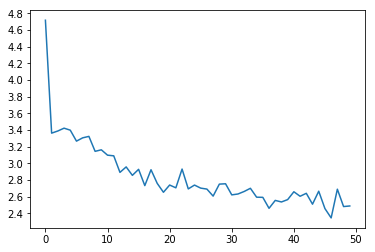

In [68]:
hidden_size = 256
encoder1 = EncoderRNN(input_lang.n_words, hidden_size)
attn_decoder1 = AttnDecoderRNN(hidden_size, output_lang.n_words, dropout_p=0.1)


if use_cuda:
    encoder1 = encoder1.cuda()
    attn_decoder1 = attn_decoder1.cuda()

trainIters(encoder1, attn_decoder1, 5000, print_every=200)

In [73]:
evaluateRandomly(encoder1, attn_decoder1)

> c est ma faute pas la tienne .
= i m to blame not you .
< you re going the the . <EOS>

> il est trop vieux pour moi .
= he s too old for me .
< he s a of of . . <EOS>

> vous n etes d aucune aide .
= you re no help .
< you re too in the . <EOS>

> vous etes dement .
= you re demented .
< you re sneaky . <EOS>

> elle est d un naturel calme .
= she s a quiet person .
< she s a a . . <EOS>

> vous etes desormais en securite .
= you re safe now .
< you re too busy . <EOS>

> il a peur de pere .
= he is afraid of father .
< he is afraid of the . <EOS>

> vous etes extravertis .
= you re extroverted .
< you re sneaky . <EOS>

> je suis un citoyen francais .
= i m a french citizen .
< i m a a . . <EOS>

> il l a fait auparavant .
= he s done this before .
< he s in the . . <EOS>



## 3.4. Visualization

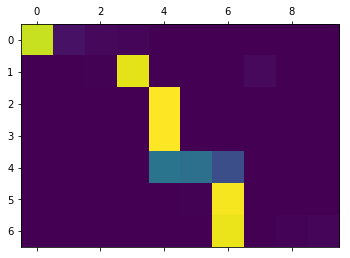

In [74]:
output_words, attentions = evaluate(
    encoder1, attn_decoder1, "je suis trop froid .")
plt.matshow(attentions.numpy())

input = elle a cinq ans de moins que moi .
output = she s a of of . <EOS>
input = elle est trop petit .
output = she s still a . <EOS>
input = je ne crains pas de mourir .
output = i m not sure of your . <EOS>
input = c est un jeune directeur plein de talent .
output = you re a a . <EOS>


c:\users\user\appdata\local\programs\python\python37\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


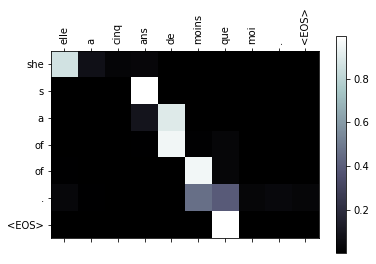

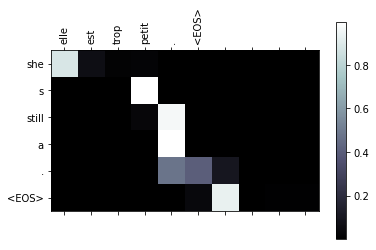

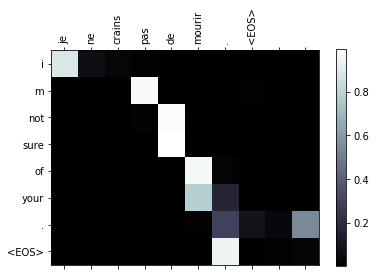

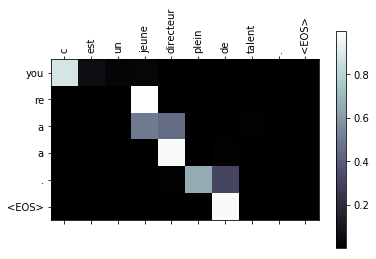

In [75]:
#########축과 라벨을 추가하는 추가 작업을 수행합니다##############

def showAttention(input_sentence, output_words, attentions):
    # Set up figure with colorbar
    fig = plt.figure()
    ax = fig.add_subplot(111)
    cax = ax.matshow(attentions.numpy(), cmap='bone')
    fig.colorbar(cax)

    # Set up axes
    ax.set_xticklabels([''] + input_sentence.split(' ') +
                       ['<EOS>'], rotation=90)
    ax.set_yticklabels([''] + output_words)

    # Show label at every tick
    ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
    ax.yaxis.set_major_locator(ticker.MultipleLocator(1))

    plt.show()


def evaluateAndShowAttention(input_sentence):
    output_words, attentions = evaluate(
        encoder1, attn_decoder1, input_sentence)
    print('input =', input_sentence)
    print('output =', ' '.join(output_words))
    showAttention(input_sentence, output_words, attentions)


evaluateAndShowAttention("elle a cinq ans de moins que moi .")

evaluateAndShowAttention("elle est trop petit .")

evaluateAndShowAttention("je ne crains pas de mourir .")

evaluateAndShowAttention("c est un jeune directeur plein de talent .")

In [1]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>